# Data Science Challenge

In [1]:
# To install packages that aren't installed by default, uncomment the last two lines of this cell 
# and replace <package list> with a list of packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install category_encoders

In [10]:
#Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from category_encoders import BinaryEncoder

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
# Set max column to display up to 101
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every job posting.
`title` | The title of the job offered. For example, Marketing Intern, Developer, etc.
`location` | The geographical location of the job.
`department` | The department of the job. For example, Sales, etc.
`industry` | The industry of the job. For example, IT, Health, etc.
`salary_range` | The salary range offered by the company (in \$\$).
`work_from_home` | The flag indicates if the job allows work from home..
`company_logo` | The flag indicates if the company offering the job has a registered logo.
`screening_round` | The flag indicates if there will be a screening round for candidates applying for the job.
`employment_type` | The type of employment offered by the company. For example, Full-time, Part-time, etc.
`required_experience` | The minimum experience required for the job. (in years).
`required_education` | The minimum required education for the job. For example, Master's Degree, Bachelor's Degree, etc.
`is_authentic` | The flag indicates if the job posting is authentic or not. Values are 1 (authentic) and 0 (not authentic).

## Data Wrangling & Visualization

In [11]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [12]:
data.head()

,id,title,location,department,industry,salary_range,work_from_home,company_logo,screening_round,employment_type,required_experience,required_education,is_authentic
0,17693,Administrative Assistant,Sacramento,Information Technology,Education Management,34000-42000,0,0,0,Full-time,Entry level,NaN,0
1,14476,Junior Lifestyle Consultant,Athens,Administrative,Telecommunications,NaN,0,1,1,Full-time,Not Applicable,Bachelor's Degree,1
2,14799,Licensed Clinician,Athens,Other,Financial Services,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,1
3,10409,English Teacher Abroad,Sacramento,Engineering,Education Management,NaN,0,1,1,Contract,NaN,Bachelor's Degree,1
4,13359,Senior Sales Executive - West,San Francisco,Administrative,Consumer Services,NaN,1,1,1,Full-time,Executive,Bachelor's Degree,1


In [75]:
#Explore columns
data.columns

Index(['id', 'title', 'location', 'department', 'industry', 'salary_range',
       'work_from_home', 'company_logo', 'screening_round', 'employment_type',
       'required_experience', 'required_education', 'is_authentic'],
      dtype='object')

In [76]:
#Description
data.describe()

,id,work_from_home,company_logo,screening_round,is_authentic
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,9449.487512,0.050450,0.667832,0.434066,0.692807
std,5469.589566,0.218925,0.471109,0.495757,0.461445
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,4897.500000,0.000000,0.000000,0.000000,0.000000
50%,8933.000000,0.000000,1.000000,0.000000,1.000000
75%,14299.500000,0.000000,1.000000,1.000000,1.000000
max,17873.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
data.shape

(2002, 13)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2002 non-null   int64 
 1   title                2002 non-null   object
 2   location             2002 non-null   object
 3   department           2002 non-null   object
 4   industry             2002 non-null   object
 5   salary_range         369 non-null    object
 6   work_from_home       2002 non-null   int64 
 7   company_logo         2002 non-null   int64 
 8   screening_round      2002 non-null   int64 
 9   employment_type      1560 non-null   object
 10  required_experience  1157 non-null   object
 11  required_education   1037 non-null   object
 12  is_authentic         2002 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 203.5+ KB


In [79]:
data.isnull().sum()

id                        0
title                     0
location                  0
department                0
industry                  0
salary_range           1633
work_from_home            0
company_logo              0
screening_round           0
employment_type         442
required_experience     845
required_education      965
is_authentic              0
dtype: int64

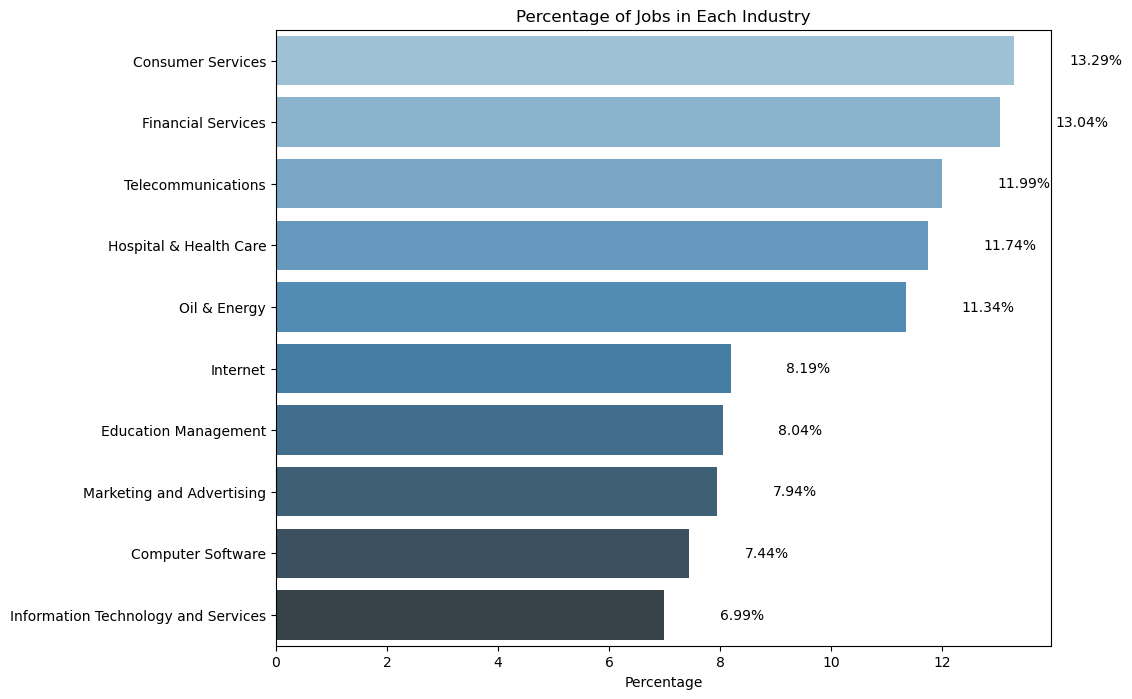

In [33]:
# Bar Chart for Job Industry Counts

# To get percentage of each job industry
industry_count = data['industry'].value_counts(normalize=True)*100

plt.figure(figsize=(10,8))  # width and height
ax = sns.barplot(x=industry_count,y=industry_count.index,palette="Blues_d")

# To annotate each bar with the percentage
for p in ax.patches:
    width = p.get_width() # getting bar length
    ax.text(width+1       # set the text at unit 1 right of the bar
            ,p.get_y()+p.get_height()/2 # getting y coordinate and half of the bar weight
            ,'{:1.2f}%'.format(width), ha = 'left', va='center') # vertical alignment

plt.title('Percentage of Jobs in Each Industry')
plt.xlabel('Percentage')
plt.show()
    

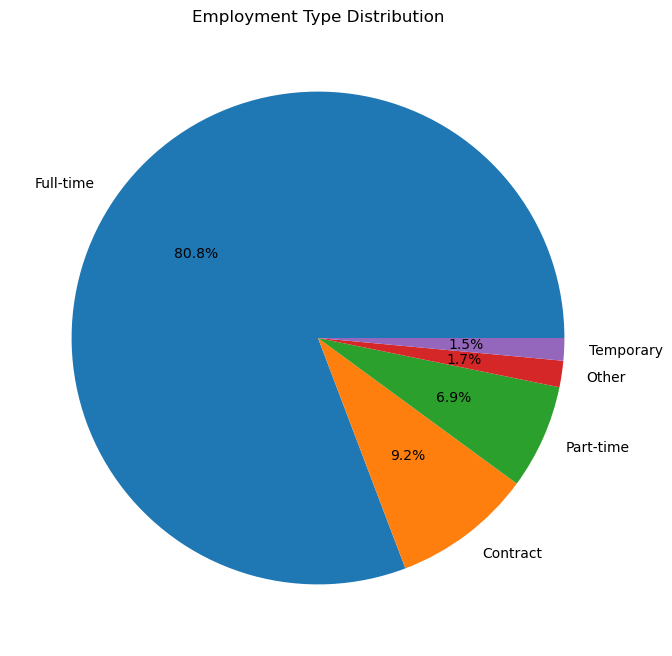

In [25]:
# Pie Chart for Employment Type

employment_type = data['employment_type'].value_counts() # Count the values of each type
plt.figure(figsize=(8,8))
employment_type.plot.pie(autopct='%1.1f%%') # Plot the pie with percentages  # colors
plt.title('Employment Type Distribution')
plt.ylabel('')
plt.show()

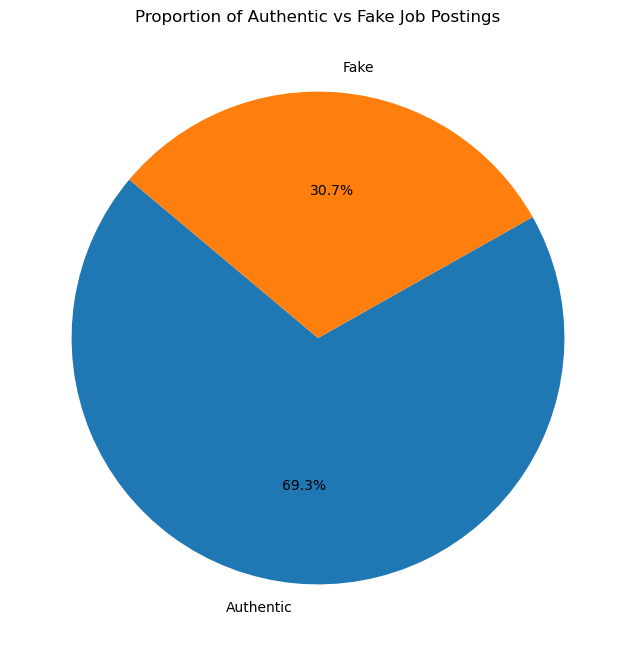

In [35]:
# Proportion of Authentic vs Fake Job Postings

# Calculating the counts of authentic and fake jobs
authentic_counts = data['is_authentic'].value_counts()


# Creating a pie chart
plt.figure(figsize=(8,8))
plt.pie(authentic_counts,labels=['Authentic', 'Fake'], autopct='%1.1f%%',
       startangle=140)
plt.title('Proportion of Authentic vs Fake Job Postings')
plt.show()

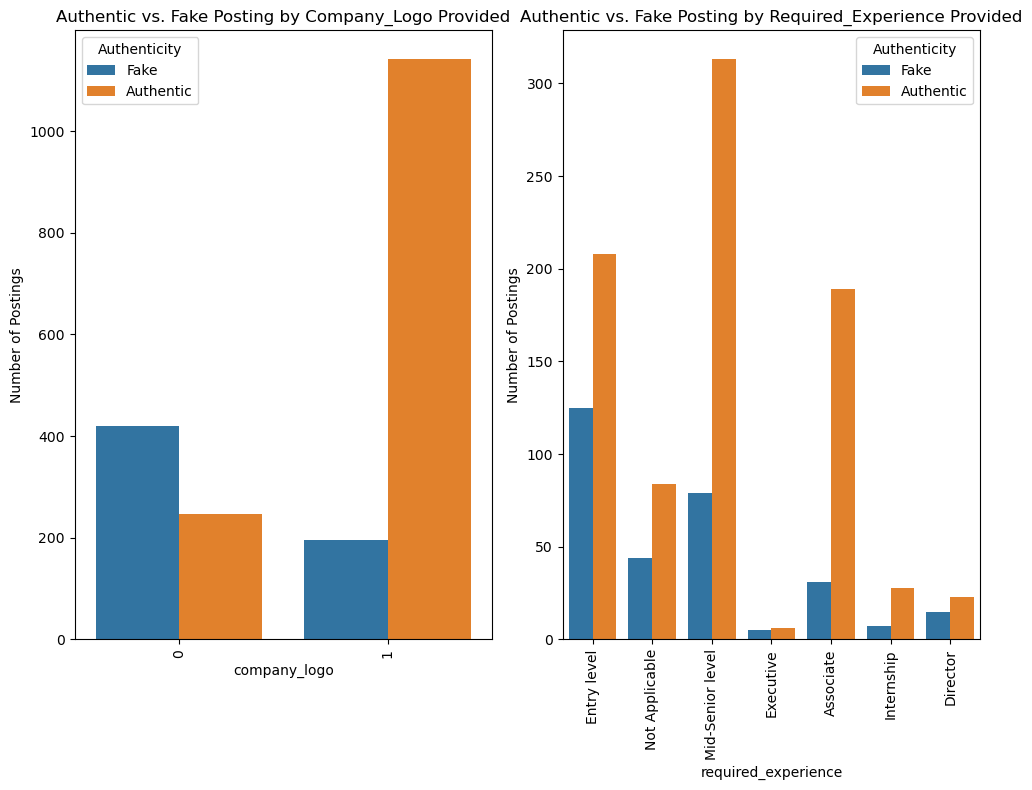

In [16]:
# Comparison of Job Features between Authentic and Fake Postings

# 1 represting authentic and 0 fake

features=['company_logo','required_experience']
plt.figure(figsize=(10,8))

for i, feature in enumerate(features,1):
    plt.subplot(1,2,i) # Create subplots for each feature
    sns.countplot(x=feature,hue='is_authentic',data=data)
    plt.title(f'Authentic vs. Fake Posting by {feature.title()} Provided')
    plt.ylabel('Number of Postings')
    plt.legend(title='Authenticity',labels=['Fake','Authentic'])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

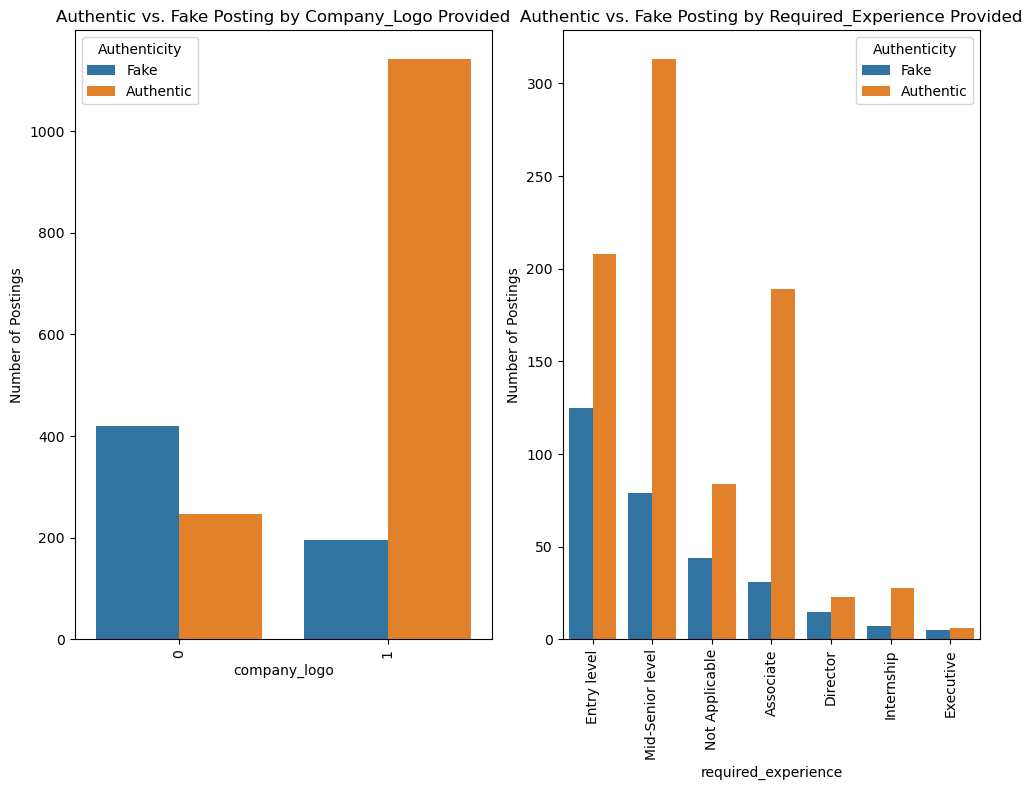

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['company_logo', 'required_experience']
plt.figure(figsize=(10, 8))

for i, feature in enumerate(features, 1):
    # Filter for fake jobs and calculate count
    fake_counts = data[data['is_authentic'] == 0].groupby(feature).size()
    # Sort categories by count
    sorted_categories = fake_counts.sort_values(ascending=False).index
    
    # Create subplots for each feature, specifying the order
    plt.subplot(1, 2, i)
    sns.countplot(x=feature, hue='is_authentic', data=data, order=sorted_categories)
    
    plt.title(f'Authentic vs. Fake Posting by {feature.title()} Provided')
    plt.ylabel('Number of Postings')
    plt.legend(title='Authenticity', labels=['Fake', 'Authentic'])
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


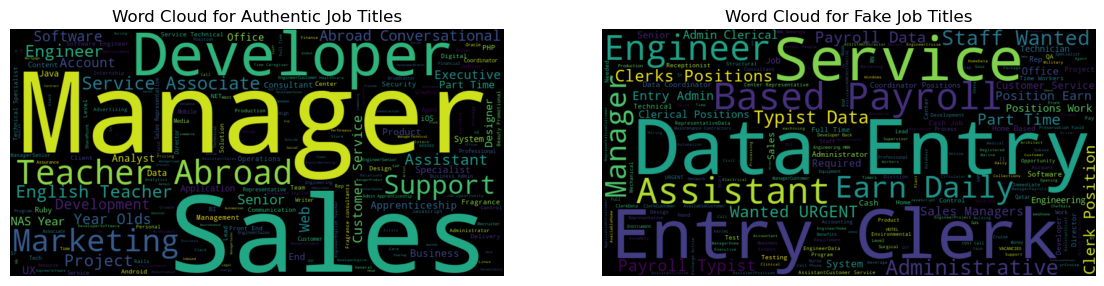

In [7]:
# Word Cloud for Job Titles

# Creating a word cloud for authentic job titles

authentic_titles = ''.join(data.loc[data['is_authentic'] == 1, 'title'])
fake_titles = ''.join(data.loc[data['is_authentic'] == 0, 'title'])

plt.figure(figsize=(14,7))

# Word Cloud for authentic job titles 
plt.subplot(1,2,1)

wordcloud_auth = WordCloud(width=800, height=400).generate(authentic_titles)
plt.imshow(wordcloud_auth, interpolation='bilinear')
plt.title('Word Cloud for Authentic Job Titles')
plt.axis('off')

# Word Cloud for Fake Job Titles
plt.subplot(1,2,2)
wordcloud_fake=WordCloud(width=800,height=400).generate(fake_titles)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake Job Titles')
plt.axis('off')

plt.show()

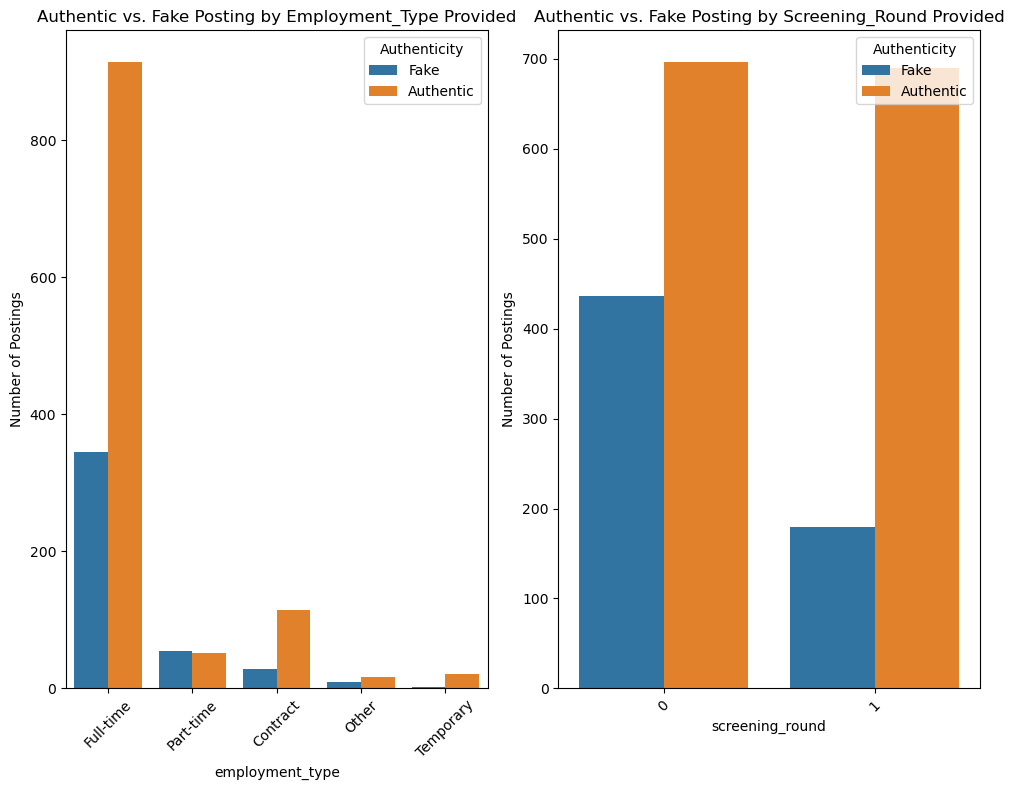

In [33]:
# Comparison of Job Features between Authentic and Fake Postings

# 1 represting authentic and 0 fake

features=['employment_type','screening_round']
plt.figure(figsize=(10,8))

for i, feature in enumerate(features,1):
    plt.subplot(1,2,i) # Create subplots for each feature
    count = data[data['is_authentic']==0].groupby(feature).size()
    
    sort_count = count.sort_values(ascending=False).index
    
    sns.countplot(x=feature,hue='is_authentic',data=data, order=sort_count)
    plt.title(f'Authentic vs. Fake Posting by {feature.title()} Provided')
    plt.ylabel('Number of Postings')
    plt.legend(title='Authenticity',labels=['Fake','Authentic'])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

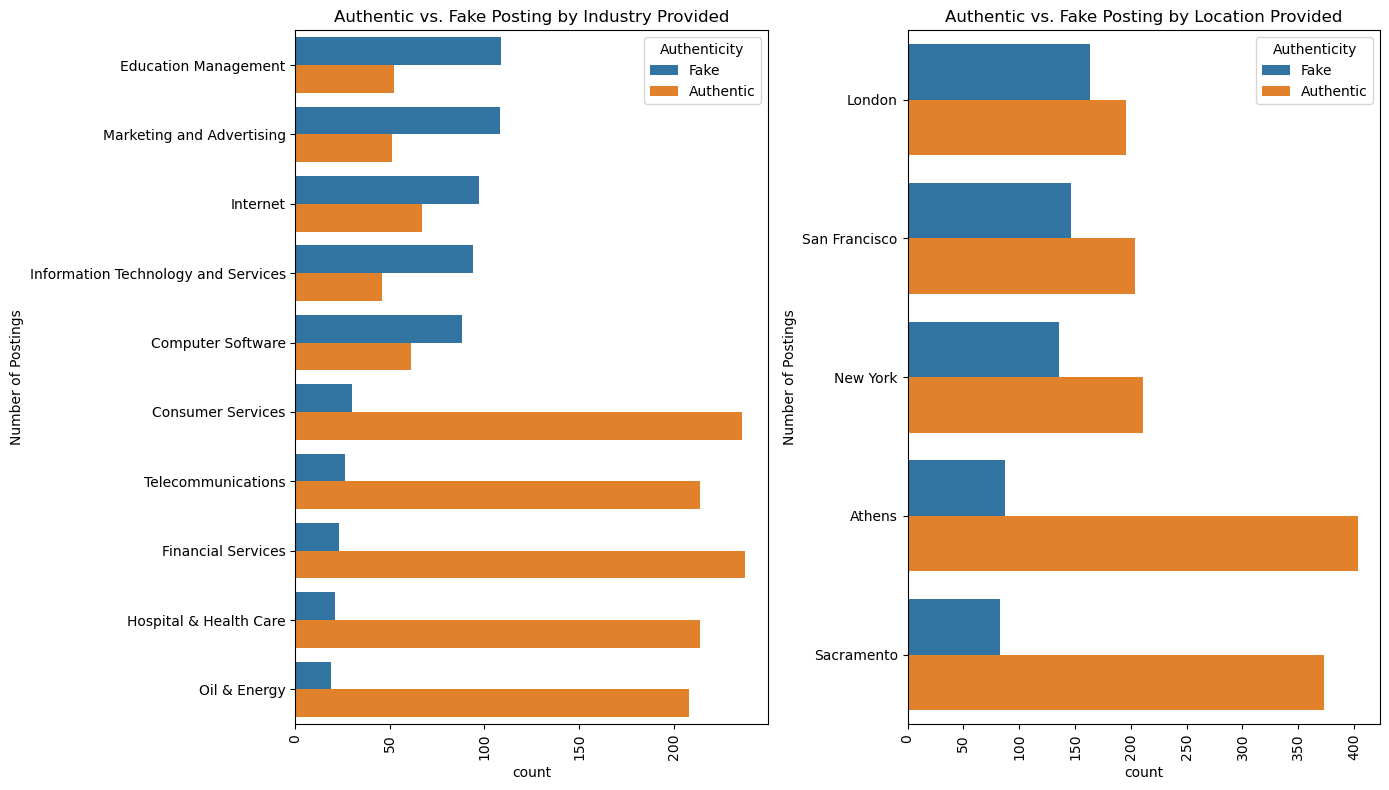

In [36]:
# Comparison of Job Features between Authentic and Fake Postings

# 1 represting authentic and 0 fake

features=['industry', 'location']
plt.figure(figsize=(14,8))

for i, feature in enumerate(features,1):
    plt.subplot(1,2,i) # Create subplots for each feature
    
    count = data[data['is_authentic']==0].groupby(feature).size()

    sort_count = count.sort_values(ascending=False).index
    
    sns.countplot(y=feature,hue='is_authentic',data=data, order=sort_count)
    plt.title(f'Authentic vs. Fake Posting by {feature.title()} Provided')
    plt.ylabel('Number of Postings')
    plt.legend(title='Authenticity',labels=['Fake','Authentic'])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualization, Modeling, Machine Learning

Build a model that can predicts the authenticity of a job posting and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [13]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,title,location,department,industry,salary_range,work_from_home,company_logo,screening_round,employment_type,required_experience,required_education
0,3911,linux Engineer,Sacramento,Health Care Provider,Oil & Energy,NaN,0,1,0,Contract,NaN,NaN
1,2808,Art Director (Freelance to Full-time),Sacramento,Engineering,Marketing and Advertising,NaN,0,1,1,Full-time,Associate,Bachelor's Degree
2,17644,Daily Money Team Representative,London,Customer Service,Internet,NaN,1,1,1,Part-time,NaN,High School or equivalent
3,11629,Sales Professional- SMB (Full-Time),New York,Marketing,Computer Software,21600-31200,0,1,0,Full-time,Entry level,High School or equivalent
4,7269,Mobile Developer,Sacramento,Design,Financial Services,NaN,0,1,0,NaN,NaN,NaN


In [81]:
# To understand wether test and train datasets have the same datatypes
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   860 non-null    int64 
 1   title                860 non-null    object
 2   location             860 non-null    object
 3   department           860 non-null    object
 4   industry             860 non-null    object
 5   salary_range         155 non-null    object
 6   work_from_home       860 non-null    int64 
 7   company_logo         860 non-null    int64 
 8   screening_round      860 non-null    int64 
 9   employment_type      682 non-null    object
 10  required_experience  515 non-null    object
 11  required_education   462 non-null    object
dtypes: int64(4), object(8)
memory usage: 80.8+ KB


In [41]:
test_data.isnull().sum()

id                     0
title                  0
location               0
department             0
industry               0
salary_range           0
work_from_home         0
company_logo           0
screening_round        0
employment_type        0
required_experience    0
required_education     0
dtype: int64

In [14]:
test_data.shape

(860, 12)

In [84]:
# Dealing with NA values from training set and test set to prepare it for modeling

data['employment_type'] = data['employment_type'].fillna('Unknown')

data['required_experience'] = data['required_experience'].fillna('Unknown')

data['required_education'] = data['required_education'].fillna('Unknown')   #######

test_data['employment_type'] = test_data['employment_type'].fillna('Unknown')

test_data['required_experience'] = test_data['required_experience'].fillna('Unknown')

test_data['required_education'] = test_data['required_education'].fillna('Unknown')

In [15]:
data = data.fillna('Unknown')
test_data = test_data.fillna('Unknown')

In [16]:
# Checking null values again
test_data.isnull().sum()

id                     0
title                  0
location               0
department             0
industry               0
salary_range           0
work_from_home         0
company_logo           0
screening_round        0
employment_type        0
required_experience    0
required_education     0
dtype: int64

In [17]:
data.isnull().sum()

id                     0
title                  0
location               0
department             0
industry               0
salary_range           0
work_from_home         0
company_logo           0
screening_round        0
employment_type        0
required_experience    0
required_education     0
is_authentic           0
dtype: int64

In [18]:
# Dropping Salary Range is it is not useful from training set
data.drop(columns=['salary_range'],inplace=True)

In [19]:
# Dropping Salary Range is it is not useful from test set
test_data.drop(columns=['salary_range'],inplace=True)

In [20]:
# Splitting Data

x = data.drop(columns=['is_authentic'])

#x = data.drop('is_authentic', axis=1)

#x = data.iloc[:,:]

y = data['is_authentic']



In [21]:
# Encoding All Categorical Variables, One Hot Encoding, Label Encoding, Frequency Encoding, Hashing, Embedding

encoder= BinaryEncoder()#cols=['title', 'location','department','industry',
                        #    'employment_type', 'required_experience','required_education'])

encoded_train = encoder.fit_transform(x[['title', 'location','department','industry',
                            'employment_type', 'required_experience','required_education']])

encoded_test = encoder.transform(test_data[['title', 'location','department','industry',
                            'employment_type', 'required_experience','required_education']])



In [22]:
# Combining encoded variables with three binary categories, append, join (based on index), merge (by keys).

train_x = pd.concat([encoded_train,data['work_from_home'],data['company_logo'],data['screening_round']],axis=1 )

test_x = pd.concat([encoded_test,test_data['work_from_home'],test_data['company_logo'],test_data['screening_round']],axis=1 )



In [59]:
# Logistic Regression Model, the simple model

# Could Use RandomizedSearchCV or GridSearch to optimize the model
# time problem tho

model1 = LogisticRegression(random_state=42)

# Train the model
model1.fit(train_x,y)

# Make Predictions
y_pred = model1.predict(test_x)




**The management wants to know what are the most important features for your model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [60]:
# Extracting feature importance

# The coefficients represent the feature importance

feature_importance = np.abs(model1.coef_[0]) # Taking absolute value to consider magnitude

# Creating Dataframe to visualize

features_df = pd.DataFrame({'Feature': train_x.columns, 'Importance':feature_importance})


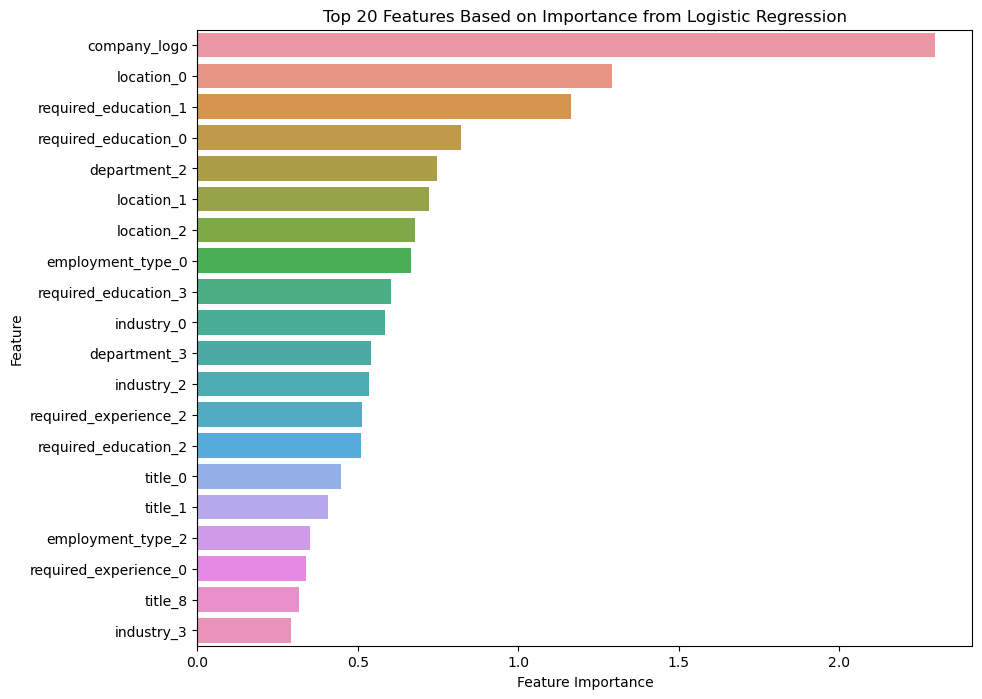

In [61]:
# Top 20 Features

top20Features = features_df.sort_values(by='Importance',ascending=False).head(20)


plt.figure(figsize=(10,8))
sns.barplot(x='Importance',y='Feature',data=top20Features) #, orient='h') # Importance, Feature
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features Based on Importance from Logistic Regression')
plt.show()

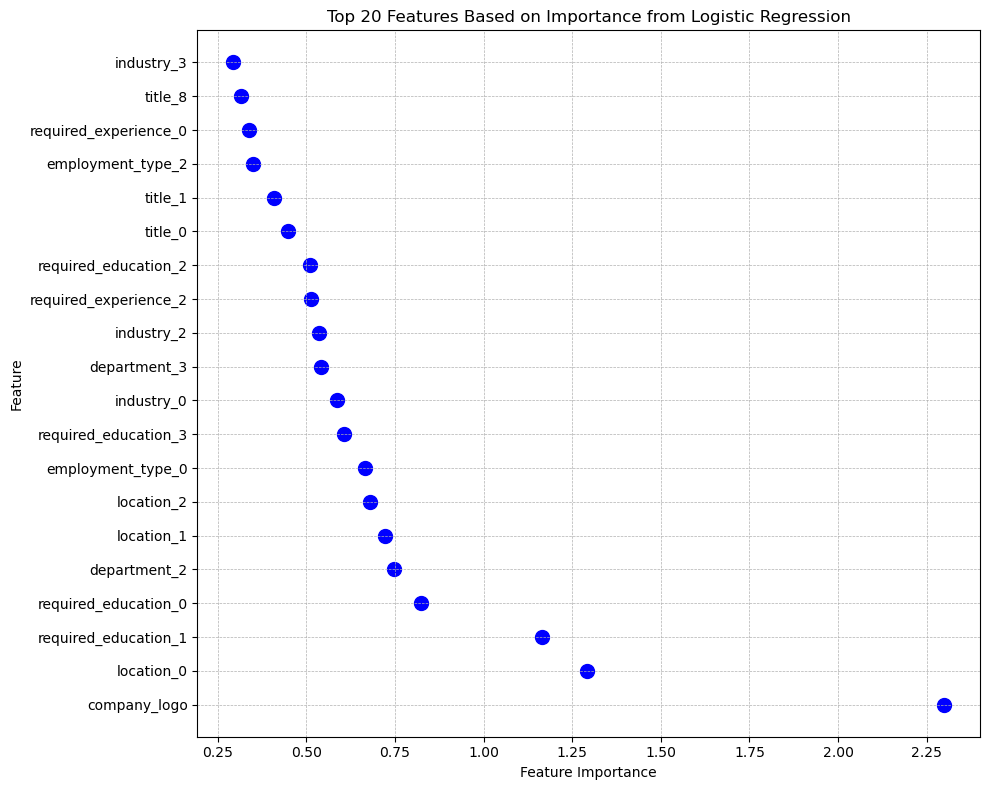

In [65]:
# Creating the dot plot
plt.figure(figsize=(10,8))
plt.scatter(top20Features['Importance'],top20Features['Feature'], color='blue', s=100)

# Adding titles and Labels
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features Based on Importance from Logistic Regression')

# Adding Grid for more readibility                          
plt.grid(True,which='both',linestyle='--',linewidth=0.5)                         
plt.tight_layout()
plt.show()                 

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `is_authentic` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **is_authentic**

In [105]:
# Save predictions on a dataframe with ID
submission_df = pd.DataFrame({'id': test_data['id'], 'is_authentic':y_pred})

In [106]:
#Submission
submission_df.to_csv('submissions2.csv',index=False)

How to evaluate test?
- Use validation set
- Domain Specific Evaluation (Assess Performance)
- Expert Labeling

# Model Performance

In [34]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

In [26]:
train_x.shape

(2002, 36)

In [31]:
x_train, x_val,y_train,y_val = train_test_split(train_x, y, test_size=0.1, random_state=42, stratify=y)

In [37]:
m = LogisticRegression()
m.fit(x_train,y_train)
y_pred = m.predict(x_val)

acc = accuracy_score(y_pred,y_val)

report = classification_report(y_pred,y_val)

print(acc)
print(report)


0.845771144278607
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        59
           1       0.90      0.88      0.89       142

    accuracy                           0.85       201
   macro avg       0.81      0.82      0.82       201
weighted avg       0.85      0.85      0.85       201



In [41]:
from sklearn.model_selection import GridSearchCV


param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

model2 = RandomForestClassifier()


grid_s = GridSearchCV(model2, param_grid=param, cv=5)
grid_s.fit(x_train,y_train)

print(grid_s.best_params_)
print(grid_s.best_estimator_)
print(grid_s.best_score_)


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestClassifier(n_estimators=300)
0.8500738688827332


In [57]:
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 5, 10], # minumum sum of instances per child
    'gamma': [0.5, 1, 1.5, 2, 5], # min_split_loss
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0], # subsamples features for each tree
    'reg_alpha': [0, 0.5, 1], # L1
    'reg_lambda': [1, 1.5, 2, 3, 4.5] # L2
}

#count_class_0 = sum(y_train == 0)+70
#count_class_1 = sum(y_train == 1)

#scale_pos_weight_value = count_class_0 / count_class_1
# scale_pos_weight=scale_pos_weight_value

# Instantiating the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Setting up RandomizedSearchCV
rnd_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fitting RandomizedSearchCV
rnd_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters found: ", rnd_search.best_params_)
print("Best score: ", rnd_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best score:  0.880621729763004


In [58]:
y_pred = rnd_search.predict(x_val)

acc = accuracy_score(y_pred,y_val)

report = classification_report(y_pred,y_val)

print(acc)

print(report)

0.8855721393034826
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        67
           1       0.90      0.93      0.92       134

    accuracy                           0.89       201
   macro avg       0.88      0.86      0.87       201
weighted avg       0.88      0.89      0.88       201

[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=10, min_child_weight=10, n_estimators=500, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=10, min_child_weight=10, n_estimators=500, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=1, reg_

[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.01, max_depth=10, min_child_weight=10, n_estimators=500, reg_alpha=0.5, reg_lambda=2, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, reg_alpha=0.5, reg_l

[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=1, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=500, reg_alpha=1, reg_lambda=1.5, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=1, reg_lambda=4.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.3, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=1, reg_lambda=4.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=300, reg_alpha=0.5, reg_la

[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=500, reg_alpha=1, reg_lambda=1.5, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, reg_alpha=0.5, reg_lambda=1.5, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=300, reg_alpha=0.5, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=5, learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=400, reg_alpha=0.5, reg_l

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Select features and label columns
assembler = VectorAssembler(inputCols=["feature1", "feature2"], outputCol="features")
df_features = assembler.transform(df_query)

# Assuming the label column is named 'label'
df_model = df_features.select("features", "label")

# Split the data into training and test sets
train_data, test_data = df_model.randomSplit([0.8, 0.2])

# Create and train a linear regression model
lr = LinearRegression(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_data)

# Make predictions
predictions = lr_model.transform(test_data)

# Evaluate the model
predictions.select("features", "label", "prediction").show()


---